# Have a quick look into the FIT files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from astropy.io import fits

In [ ]:
### Path to the FIT file
path2fit = 'C:\\xrt\\output\\data\\raw\\FITfiles\\'
#fit_filename = 'meteoswiss_20250401_084500_01.fit'
fit_filename = 'meteoswiss_20250401_090000_01.fit'

### Select a frequency to look at [MHz]
this_freq = 10640

In [18]:
hdulist = fits.open(path2fit+fit_filename)
main_header = hdulist[0].header
axis_header = hdulist[1].header
digits = hdulist[0].data                    # extract raw voltage
freq_MHz = hdulist[1].data['Frequency'][0]  # extract frequency axis in MHz
time_s = hdulist[1].data['Time'][0]         # extract time axis (in seconds, with timeax[0] = 0)

date_fit = hdulist[0].header['DATE-OBS']    # date of the FIT
time_start = hdulist[0].header['TIME-OBS']  # start time of the fit
datetime_fit = pd.to_datetime(date_fit+' '+time_start)

time_axis = datetime_fit + pd.to_timedelta(time_s, unit='seconds')

digits.shape, freq_MHz.shape, time_s.shape

((100, 3600), (100,), (3600,))

In [19]:
### Convert the 8-bit digits to mV
mV = digits/255.*2500.0
    # 255:  8-bit analog-to-digital converter (ADC)
    # 2500: reference voltage of 2.5 V = 2500 mV
        # the reference voltage determines the maximum voltage that can be measured.
        # it also determines the resolution of each digital step: 2500 mV / 255 steps = 9.8 mV/step

In [20]:
#main_header
#axis_header

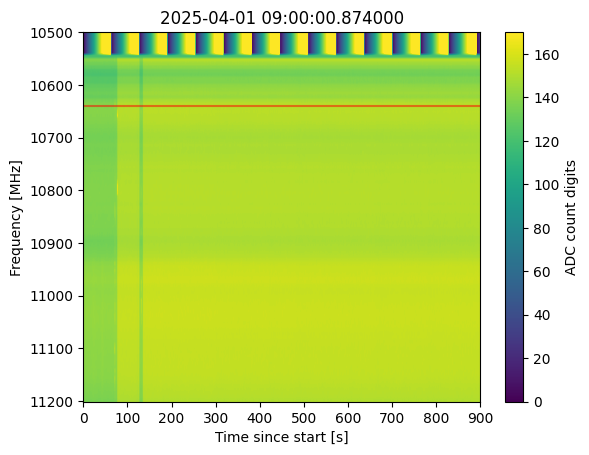

In [21]:
plt.figure()
extent = [time_s[0], time_s[-1], freq_MHz[0], freq_MHz[-1]]
plt.imshow(digits, extent=extent, aspect='auto', origin='lower', vmin=0, vmax=170)
cbar = plt.colorbar()
cbar.set_label('ADC count digits')
plt.xlabel('Time since start [s]')
plt.xlim([0, 900])
plt.ylabel('Frequency [MHz]')
plt.hlines(this_freq, 0, 900, color='red', alpha=0.5)
plt.title(time_axis[0])
plt.show()

In [22]:
idx_freq = np.argmin(abs(freq_MHz - this_freq))
idx_freq, freq_MHz[idx_freq]

(74, 10637.1884765625)

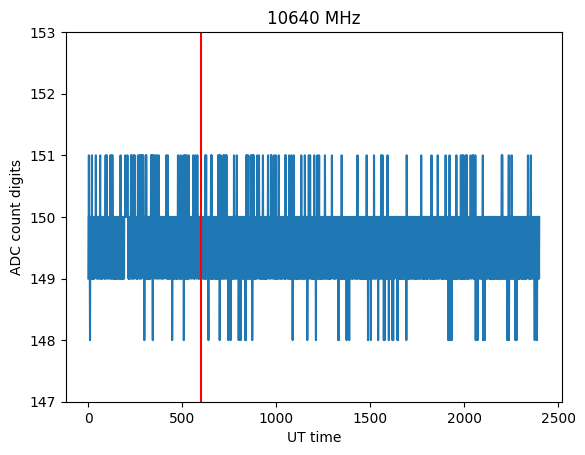

In [37]:
plt.figure()
#plt.plot(time_axis, digits[idx_freq,:])
plt.plot(digits[idx_freq,600:3000])
plt.vlines(600,147,153,colors='red')
plt.xlabel('UT time')
plt.ylabel('ADC count digits')
plt.title(str(this_freq)+' MHz')
plt.ylim([147,153])
plt.show()

In [35]:
1000*0.25/60

4.166666666666667

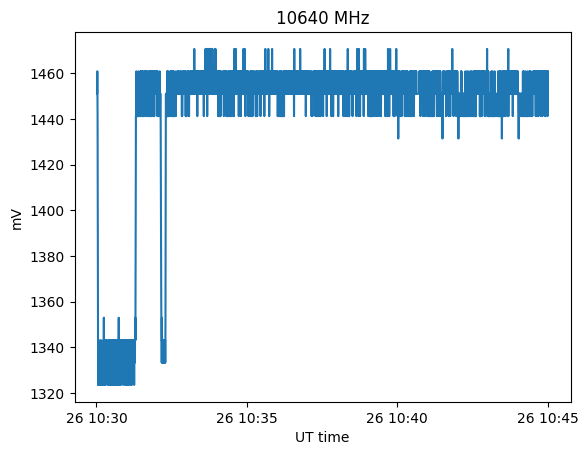

In [25]:
plt.figure()
plt.plot(time_axis, mV[idx_freq,:])
plt.xlabel('UT time')
plt.ylabel('mV')
plt.title(str(this_freq)+' MHz')
#plt.hlines(1490,time_axis[0],time_axis[-1],colors='red')
#plt.hlines(1480,time_axis[0],time_axis[-1],colors='red',linestyles='dashed')
#plt.ylim([1450,1500])
plt.show()

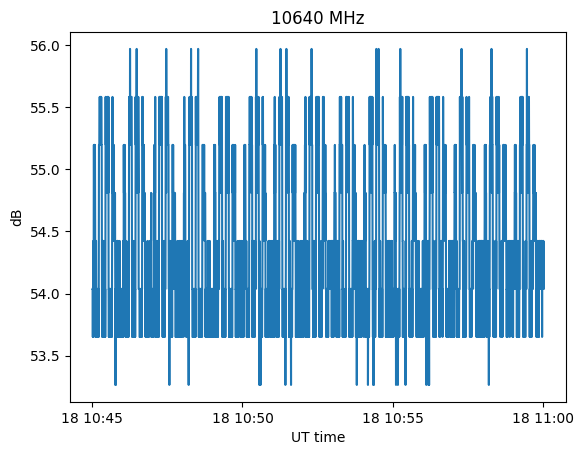

In [25]:
plt.figure()
plt.plot(time_axis, mV[idx_freq,:]/25.4)
plt.xlabel('UT time')
plt.ylabel('dB')
plt.title(str(this_freq)+' MHz')
#plt.hlines(1490,time_axis[0],time_axis[-1],colors='red')
#plt.hlines(1480,time_axis[0],time_axis[-1],colors='red',linestyles='dashed')
#plt.ylim([1450,1500])
plt.show()

In [8]:
dfreq = 0.0625
#freq0 = 10835.438 - 10 - 50*dfreq
freq0 = 10637.188 - 10 - 50*dfreq
for ii in range(1,101):
    freq = freq0+ii*dfreq
    print('[{:04}]'.format(ii)+'=%.4f,0'%(freq))
    #print('[%4d]=%.4f,0'%(ii,freq))

[0001]=10624.1255,0
[0002]=10624.1880,0
[0003]=10624.2505,0
[0004]=10624.3130,0
[0005]=10624.3755,0
[0006]=10624.4380,0
[0007]=10624.5005,0
[0008]=10624.5630,0
[0009]=10624.6255,0
[0010]=10624.6880,0
[0011]=10624.7505,0
[0012]=10624.8130,0
[0013]=10624.8755,0
[0014]=10624.9380,0
[0015]=10625.0005,0
[0016]=10625.0630,0
[0017]=10625.1255,0
[0018]=10625.1880,0
[0019]=10625.2505,0
[0020]=10625.3130,0
[0021]=10625.3755,0
[0022]=10625.4380,0
[0023]=10625.5005,0
[0024]=10625.5630,0
[0025]=10625.6255,0
[0026]=10625.6880,0
[0027]=10625.7505,0
[0028]=10625.8130,0
[0029]=10625.8755,0
[0030]=10625.9380,0
[0031]=10626.0005,0
[0032]=10626.0630,0
[0033]=10626.1255,0
[0034]=10626.1880,0
[0035]=10626.2505,0
[0036]=10626.3130,0
[0037]=10626.3755,0
[0038]=10626.4380,0
[0039]=10626.5005,0
[0040]=10626.5630,0
[0041]=10626.6255,0
[0042]=10626.6880,0
[0043]=10626.7505,0
[0044]=10626.8130,0
[0045]=10626.8755,0
[0046]=10626.9380,0
[0047]=10627.0005,0
[0048]=10627.0630,0
[0049]=10627.1255,0
[0050]=10627.1880,0
